In [1]:
# Imports
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
from squigglepy import bayes
import matplotlib.pyplot as plt
from pprint import pprint
print('Loaded 1/2...')


def hist(samples, title=None, bins=200):
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.hist(samples, bins=bins)
    if title is not None:
        plt.title(title)
    return plt.show()


def plot_cdf(xs, ys, title=None, xlabel=None, ylabel=None):
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.plot(xs, ys, marker=".", markersize=10)
    
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)

    for x, y in zip(xs, ys):
        if len(ys) < 15 or x % 2 == 0:
            label = "{:.2f}".format(y)
            plt.annotate('{}%'.format(int(y * 100)),
                         (x, y),
                         textcoords="offset points",
                         xytext=(0, 10),
                         ha='center')
            
    if title is not None:
        plt.title(title)
        
    return plt.show()

print('Loaded 2/2...')

Loaded 1/2...
Loaded 2/2...


In [2]:
# Define model
def model():
    return sq.mixture([sq.norm(1, 2), sq.norm(3, 4)], weights=[0.1, 0.9])

print('Loaded...')

Loaded...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2816.98it/s]


-
Mean: 3.3, SD: 0.67
-


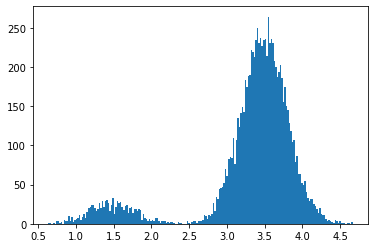

{1: 1.11,
 5: 1.49,
 10: 2.63,
 20: 3.13,
 30: 3.27,
 40: 3.37,
 50: 3.45,
 60: 3.54,
 70: 3.62,
 80: 3.73,
 90: 3.86,
 95: 3.98,
 99: 4.21}


In [3]:
# Sample model
n_samples = 10*K
samples = sq.sample(model, n=n_samples, verbose=True)

print('-')
print('Mean: {}, SD: {}'.format(round(np.mean(samples), 2),
                                round(np.std(samples), 2)))
print('-')
hist(samples)
pprint(sq.get_percentiles(samples, digits=2))
